In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
results=pd.read_csv(r"C:\Preet\results.csv")
advertisers = pd.read_csv(r"C:\Preet\advertisers.csv")
locations = pd.read_csv(r"C:\Preet\locations.csv")
results.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [4]:
advertisers.head()

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879


In [5]:
locations.head()

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242


# The results data has a column named state, and the location data has a column named location name. We will merge these datasets using these columns:

In [6]:
results['State'] = results['State'].str.strip().str.lower()

In [7]:
locations['Location name'] = locations['Location name'].str.strip().str.lower()


In [8]:
merged_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


# Let’s have a look at the total ad spend by state:

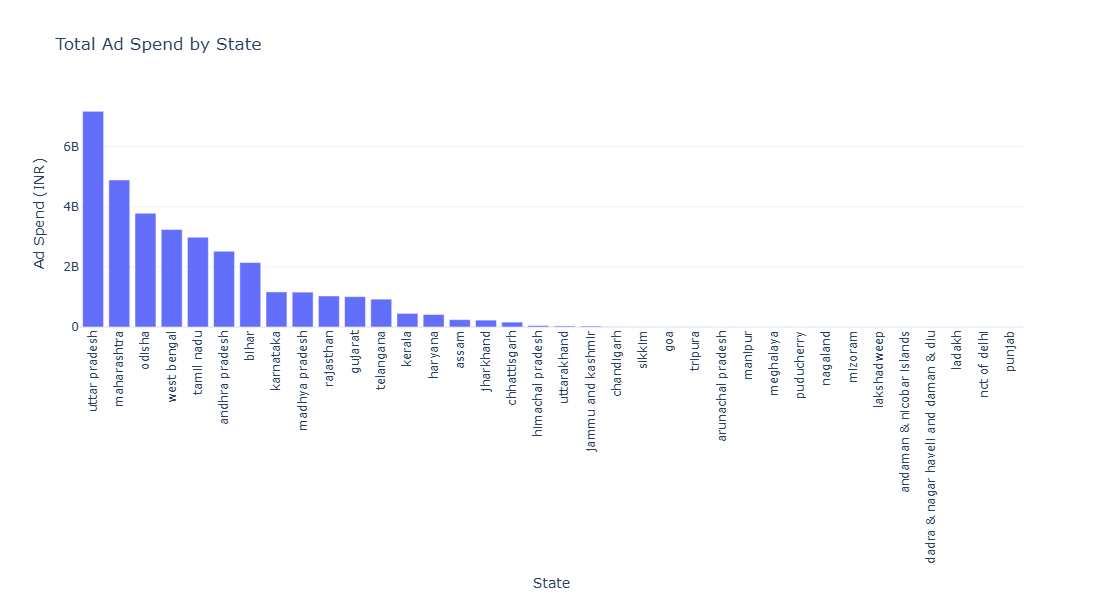

In [10]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

fig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',
             labels={'State': 'State', 'Amount spent (INR)': 'Ad Spend (INR)'},
             title='Total Ad Spend by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

The bar graph shows the total ad spend (in INR) by state. Uttar Pradesh leads significantly with the highest ad spend, followed by Maharashtra and Odisha. States like West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar also show substantial ad expenditures. In contrast, states such as Lakshadweep, Dadra & Nagar Haveli, Daman & Diu, Andaman & Nicobar Islands, and Arunachal Pradesh have the lowest ad spend. It indicates that larger and more populous states tend to spend more on ads, likely reflecting their greater political significance and larger voter base.

Now, let’s have a look at the average voter turnout by state:


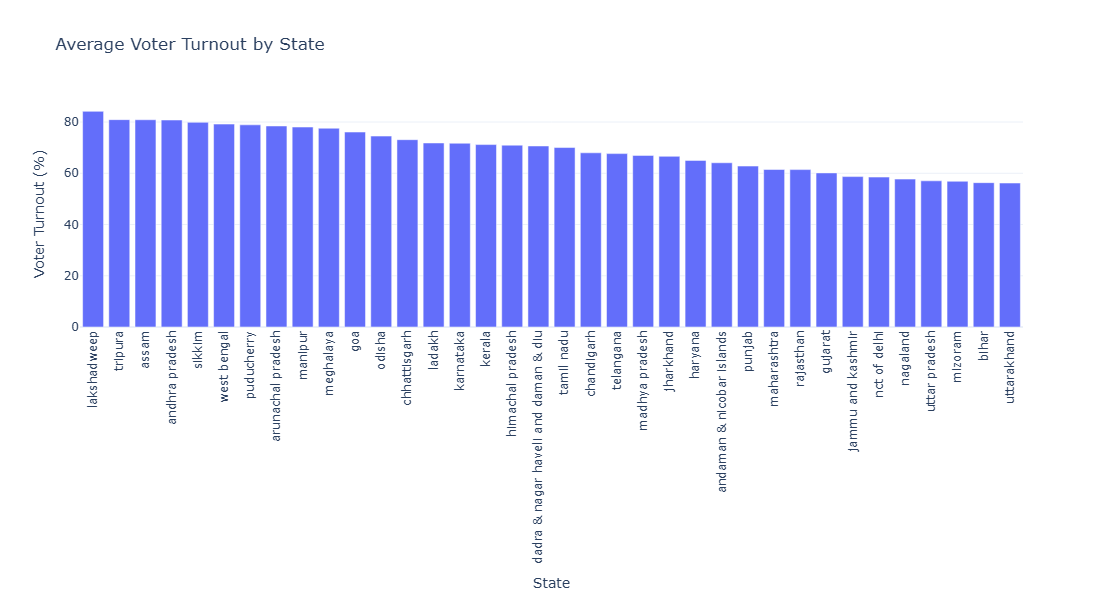

In [17]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

fig = px.bar(state_voter_turnout, x='State', y='Polled (%)',
             labels={'State': 'State', 'Polled (%)': 'Voter Turnout (%)'},
             title='Average Voter Turnout by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

Lakshadweep has the highest average voter turnout at nearly 80%, followed closely by Tripura and Assam. States like Andhra Pradesh, Sikkim, and West Bengal also show high voter engagement, with turnouts above 70%. On the other end of the spectrum, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, around 50-55%. It indicates significant regional variations in voter participation, with some smaller states and union territories exhibiting higher engagement compared to larger states with higher ad spend.

Now, let’s have a look at the top 5 parties by ad spend:

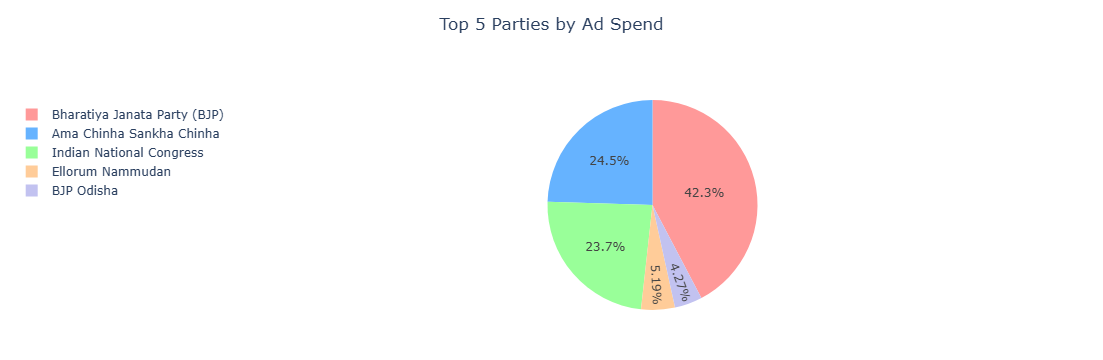

In [12]:
advertisers['Amount spent (INR)'] = pd.to_numeric(advertisers['Amount spent (INR)'], errors='coerce')

advertisers.dropna(subset=['Amount spent (INR)'], inplace=True)

party_ad_spend = advertisers.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

top_5_parties = party_ad_spend.head(5).reset_index()

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

fig = px.pie(top_5_parties, values='Amount spent (INR)', names='Page name',
             title='Top 5 Parties by Ad Spend', color_discrete_sequence=colors,
             labels={'Page name': 'Political Party', 'Amount spent (INR)': 'Ad Spend (INR)'})

fig.update_traces(textinfo='percent')

fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=-0.3
    ),
    title=dict(
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    margin=dict(l=200, r=50, t=100, b=50) 
)

fig.show()

The Bharatiya Janata Party (BJP) has the highest ad spend, accounting for 42.3% of the total. This is followed by the Ama Chinha Sankha Chinha party at 24.5% and the Indian National Congress at 23.7%. Ellorum Nammudan and BJP Odisha have significantly lower ad spends, at 5.19% and 4.27%, respectively. It indicates that BJP dominates in terms of ad spending on Facebook and Instagram ads, with nearly half of the total expenditure, suggesting a significant investment in advertising compared to other parties.

In [13]:
# calculate the correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, with a correlation coefficient of -0.010688. This indicates that there is virtually no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

Now, let’s have a look at the relationship between ad spend and voter turnout by parliamentary constituency:

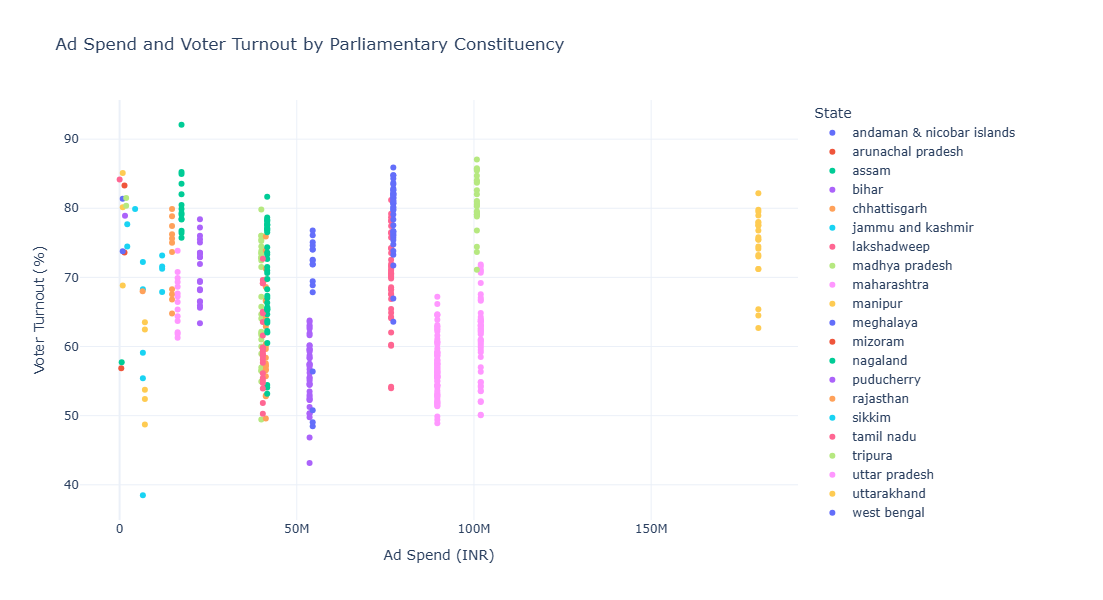

In [14]:
merged_constituency_data = results.merge(
    locations,
    left_on='State',
    right_on='Location name',
    how='left'
)

fig = px.scatter(merged_constituency_data, x='Amount spent (INR)', y='Polled (%)',
                 color='State',
                 labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Polled (%)': 'Voter Turnout (%)'},
                 title='Ad Spend and Voter Turnout by Parliamentary Constituency')

fig.update_layout(width=800, height=600)

fig.show()

It shows that higher ad spending does not necessarily correlate with higher voter turnout. Voter turnout seems to cluster between 60% and 80% across most constituencies, regardless of the ad spend amount, which ranges from 0 to 150 million INR. This suggests that other factors besides ad spend may play a significant role in influencing voter turnout.

Now, let’s have a look at the distribution of ad spending:

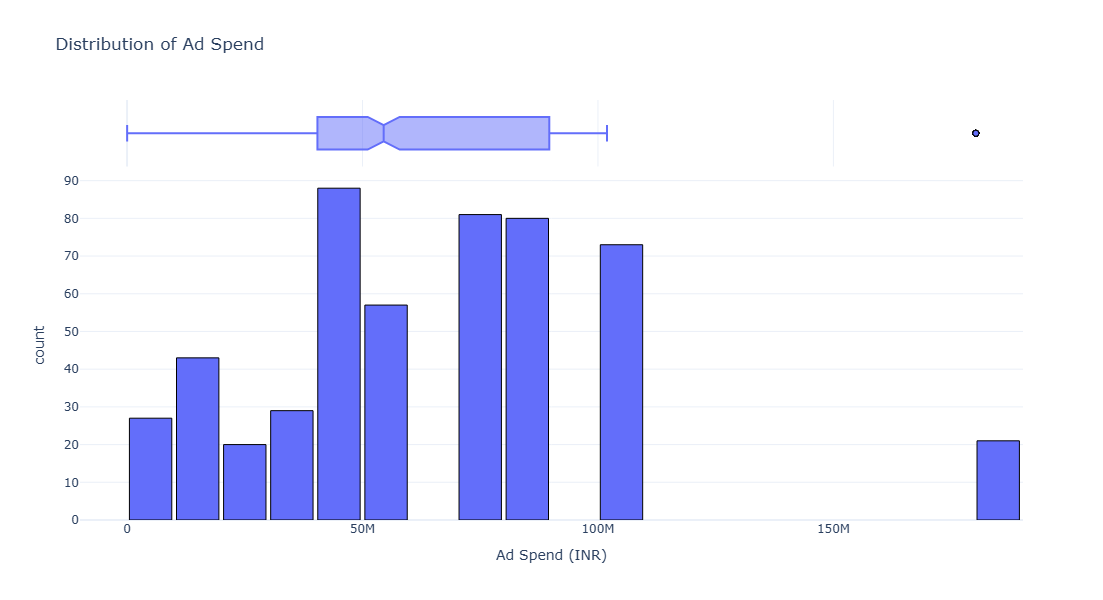

In [15]:
fig = px.histogram(merged_data, x='Amount spent (INR)', nbins=30, marginal='box',
                   labels={'Amount spent (INR)': 'Ad Spend (INR)'},
                   title='Distribution of Ad Spend')

fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_layout(bargap=0.1, width=800, height=600)

fig.show()

The histogram indicates that most constituencies have ad spends clustered around the 50M and 100M INR marks, with fewer constituencies spending less than 10M INR or more than 150M INR. The box plot highlights that the median ad spend is around 70M INR, with the interquartile range (IQR) spanning from approximately 30M to 110M INR. There are a few outliers, particularly a constituency with an exceptionally high ad spend above 150M INR. This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

Now, let’s analyze ad spending and voter turnout by election phase:

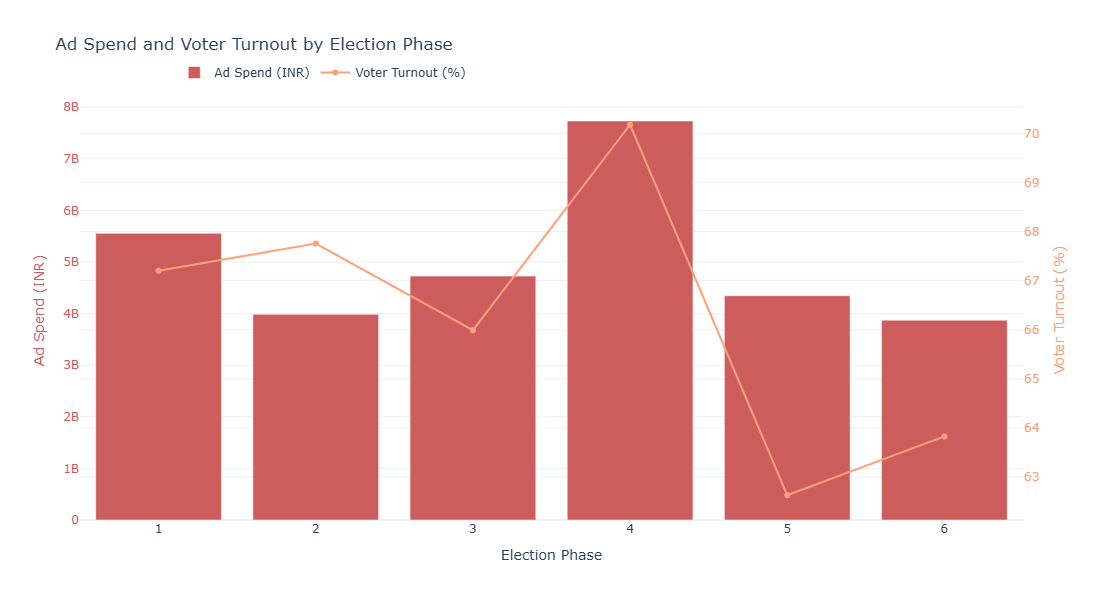

In [16]:
import plotly.graph_objects as go

phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_analysis['Phase'],
    y=phase_analysis['Amount spent (INR)'],
    name='Ad Spend (INR)',
    marker_color='indianred',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=phase_analysis['Phase'],
    y=phase_analysis['Polled (%)'],
    name='Voter Turnout (%)',
    marker_color='lightsalmon',
    yaxis='y2'
))

fig.update_layout(
    title='Ad Spend and Voter Turnout by Election Phase',
    xaxis=dict(title='Election Phase'),
    yaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(color='indianred'),
        tickfont=dict(color='indianred')
    ),
    yaxis2=dict(
        title='Voter Turnout (%)',
        titlefont=dict(color='lightsalmon'),
        tickfont=dict(color='lightsalmon'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    width=800,
    height=600
)

fig.show()

There is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.

# Conclusion
Overall, the analyses indicate that higher ad spend does not guarantee higher voter turnout and voter engagement is influenced by various other factors. Larger and more significant states tend to spend more on ads, but this does not necessarily translate to higher voter participation. Political parties, particularly the BJP, invest heavily in advertising, yet the effectiveness of this spending in increasing voter turnout is questionable.